# Web Scraping implementation on Amazon India website

By - Abhishek Kumar Singh

---

This project is focussed on searching and extracting data of any item from <b>Amazon India's</b> ecommerce site - https://www.amazon.in/
This project uses webscraping through Selenium and BeautifulSoup to provide the desired result. The project is included with explaination of every part of the code and at the very bottom you can find the final executable code.

In this project I have displayed only 1 type of product and extracted details of only 4 attributes i.e., <b>Name</b>, <b>Price</b>, <b>Rating</b>, <b>Number of reviews</b>, <b>URL of product</b>. The code can be modified according to the use and website being scraped. At last the project will return a <b>.csv</b> file which can be used for analysis purpose on products or the site.

Initially we need to install BeautifulSoup and Selenium. Below are the mention versions and commands to install the versions that I have used.

System - Windows 10, 64 bit
<br>
BeautifulSoup 4, bs4 : - ```pip install beautifulsoup4``` or ```python -m pip install beautifulsoup4```
<br>
Selenium 3.141.0 : - ```pip install selenium``` or ```python -m pip install selenium```

---
<br>

## Import neccessary packages

In [1]:
import csv
import os
from selenium import webdriver
from bs4 import BeautifulSoup

---
<br>

## Web driver

Browser -> Microsoft Edge

The code below will open the bowser and wit for you to enter the URL

In [2]:
driver = webdriver.Edge(executable_path="D:/Downloads/Edge Downloads/edgedriver_win64/msedgedriver.exe")

For any other browser follow the below syntax: -
<br>
<code>driver = webdriver.BrowserName(executable_path="Path to the driver.exe file")</code>

For more info on browsers supported by selenium and how to use them, visit - "https://www.selenium.dev/documentation/en/webdriver/driver_requirements/"

---
<br>

## Enter URL of Amazon India

.get() function takes takes URL as argument and opens the site

In [3]:
url = "https://www.amazon.in/"
driver.get(url)

---
<br>

## Generate URL for searching

We need to provide the name of item to be searched and combine it with the URL to be able to search.

We'll use <b>search_term</b> variable to give the name of item

In [4]:
def get_url(search_term):
    """Generate url with search term"""
    template = "https://www.amazon.in/s?k={}&ref=nb_sb_noss_2"
    search_term = search_term.replace(" ", "+")
    return template.format(search_term)

We are replacing spaces with "+" inn search_term because in URLs there are no spaces and multiple word input is joined with this sign.

We can see URL for search_term = "laptop bags"

In [5]:
url = get_url('MSI laptops')
print(url)

https://www.amazon.in/s?k=MSI+laptops&ref=nb_sb_noss_2


In [6]:
driver.get(url)

---
<br>

## Extract Data

Now, we need to extract all the HTML code that is present in <b>Page Source</b>. We can also see this by right clicking on the site and selecting <b>View page source</b> in the menu. But, copying all the code manually is not efficient so, we have used <b>Beautiful Soup</b> for this purpose

In [7]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

We are interested only in the variety of results related to our search_term so after analysing the page source below tag is found to be suitable for extracting the relevant data.

```<div data-component-type = "s-search-result">```

We will extract all the data which has this tag.

In [8]:
data_extracted = soup.find_all('div', {'data-component-type': 's-search-result'})

The above code will extract the data from only first page. We'll use this to loop over pages and extract data from each page in the further code.

The length of data_extracted is equal to the number of products on first page. But, this data may contain products which has not mentioned its price, rating or number of review. This may lead to an error which we'll counter later

In [9]:
len(data_extracted)

22

---
<br>

## Data Prototype 

We need to have the basic idea about tags to be used for extraction of any specific data about a product. So we need to create a prototype for reference.

In [10]:
item_prototype = data_extracted[0]

Earlier in data_extracted list we had all the HTML code separated for every product but now we need only some specific details like price and ratings, which can lead us to any conclusion about a product. Therefore the <b>extract_record()</b> is created to help us with that.

In [11]:
def extract_record(item_prototype):
    """Extract and return data from single record"""
        
    # name and url
    atag = item_prototype.h2.a
    name = atag.text.strip()
    new_url = url[:-1]+atag.get('href')
    
    # price
    price_parent = item_prototype.find('span', 'a-price')
    price = price_parent.find('span', 'a-offscreen').text

    # rating and review_count
    rating = item_prototype.i.text
    review_count = item_prototype.find('span', {'class': 'a-size-base'}).text

    res = (description, price, rating, review_count, url)
    return res

The above <b>extract_record()</b> function is suitable only if all the variables are assigned with some values. But, in some product there may not be price or reviews. So, we need to perform some error handling on these variables.

---
<br>

## Error handling

In [12]:
def extract_record(item_prototype):
    """Extract and return data from single record"""
        
    # name and url
    atag = item_prototype.h2.a
    name = atag.text.strip()
    new_url = "http://www.amazon.in"+atag.get('href')
    
    try:
        # price
        price_parent = item_prototype.find('span', 'a-price')
        price = price_parent.find('span', 'a-offscreen').text
        
    except AttributeError:
        return
    
    try:
        # rating and review_count
        rating = item_prototype.i.text
        review_count = item_prototype.find('span', {'class': 'a-size-base'}).text
    except AttributeError:
        rating = ''
        review_count = 0
    
    res = (name, price, rating, review_count, new_url)
    return res

The below loop will iterate over every product and retrieve the data into <b>records</b> list which eventually will become a list of tuples.

In [13]:
records = []
for item in data_extracted:
    record = extract_record(item)
    if record:
        records.append(extract_record(item))

print(records[0])

('MSI GF75 Thin, Intel i7-10750H, 17.3" (43.9 cm) FHD IPS-Level 144Hz Panel Laptop (8GB/512GB NVMe SSD/Windows 10 Home/Nvidia GTX1650 4GB GDDR6/Black/2.2Kg), 10SCXR-654IN', '₹74,990', '4.2 out of 5 stars', '3', 'http://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A0329867302QDVUZGKRXV&url=%2FMSI-i7-10750H-IPS-Level-Windows-10SCXR-654IN%2Fdp%2FB093L8QGL7%2Fref%3Dsr_1_1_sspa%3Fdchild%3D1%26keywords%3DMSI%2Blaptops%26qid%3D1627324637%26sr%3D8-1-spons%26psc%3D1&qualifier=1627324637&id=2274138165704014&widgetName=sp_atf')


---
<br>

## Navigating to next page

We need to navigate through all the pages to get the full data on any searched item. 

https://www.amazon.in/s?k=laptop+bags&page=2&qid=1627206041&ref=sr_pg_1

Here we can see that there is a page query in the url and we will use that query to navigate thorugh pages. Each query is concatenated with URL along with "&"

In [14]:
def get_url(search_term):
    """Generate url with search term"""
    template = "https://www.amazon.in/s?k={}&ref=nb_sb_noss_2"
    search_term = search_term.replace(" ", "+")
    
    # Add page query to url
    url = template.format(search_term)
    
    # Add page to the placeholder
    url += '&page={}'
    
    return url

After running above function the query will look something like-

https://www.amazon.in/s?k=laptop+bags&ref=nb_sb_noss_2&page{}

Here we can pass any page number in the placeholder "{}"

---
<br>

## Combine the code together

Below is the compilation of the above functions and assignments as per the necessary order. One can simply copy this code and run on there system if they have the packages installed.

In [52]:
import pandas as pd
import numpy as np
import os
from selenium import webdriver
from bs4 import BeautifulSoup

def get_url(search_term):
    """Generate url with search term"""
    
    template = "https://www.amazon.in/s?k={}&ref=nb_sb_noss_2"
    search_term = search_term.replace(" ", "+")
    
    # Add search term to url
    url = template.format(search_term)
    
    # Add page query to the placeholder
    url += '&page={}'
    
    return url

def extract_record(item):
    """Extract and return data from single record"""
        
    # name and url
    atag = item.h2.a
    name = atag.text.strip()
    new_url = "http://www.amazon.in"+atag.get('href')
    
    try:
        # price
        price_parent = item.find('span', 'a-price')
        price = price_parent.find('span', 'a-offscreen').text
        
    except AttributeError:
        return
    
    try:
        # rating and review_count
        rating = item.i.text
        review_count = item.find('span', {'class': 'a-size-base'}).text
    except AttributeError:
        rating = ''
        review_count = 0
    
    res = [name, price, rating, review_count, new_url]
    return res

def driverFunction(search_term, file_name): # File name should have .csv ending
    
    DRIVER = webdriver.Edge(executable_path="D:/Downloads/Edge Downloads/edgedriver_win64/msedgedriver.exe")
    
    DATA = []
    URL = get_url(search_term)
    
    for page in range(1,21):
        DRIVER.get(URL.format(page))
        SOUP = BeautifulSoup(DRIVER.page_source, 'html.parser')
        RESULTS = SOUP.find_all('div', {'data-component-type': 's-search-result'})
        for item in RESULTS:
            RES = extract_record(item)
            if RES:
                DATA.append(RES)
    
    DRIVER.close()
    
    df = pd.DataFrame(DATA, columns = ['Name', 'Price', 'Ratings', 'Review_Count', 'URL'])
    df.to_csv(file_name, index=False)

In [54]:
if __name__=="__main__":
    driverFunction("laptop bags", "Amazon_Laptop_Bags.csv")

<b>driverFunction()</b> function will export a amazon_scape_data.csv file which can be used to look for suitable product and for future analysis purpose

---
<br>

## Let's take this project to next step

Now that we have developed a way to scrap data, we can perform some analysis and visual representation on any data we want. 

Let's look into some MSI Laptops on Amazon India -

In [17]:
main("msi laptop", "Amazon_MSI_Laptops.csv")

>**<u>NOTE</u> -** 
>>On amazon most of the important technical details are mentioned in the name itself.
<br> 
>>Prices may vary from the time of data extraction

<br>
ex - MSI GF75 17.3" FHD 120Hz Thin Gaming Laptop, 10th Gen Intel Core i5-10300H, Backlight Keyboard, HDMI, Wi-Fi 6, Webcam, Amazon Alexa, USB-C, GeForce GTX 1650, Windows 10 (32GB RAM|512GB PCIe SSD)

<br>This products name also includes the screen refresh rate, processor name, graphics card detail, OS name, storage and RAM details. So these will be sufficient for initial screening.

---
<br>

### Reading and exploring the dataset

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
col = ['Name', 'Price', 'Ratings', 'Review_Count', 'URL']
MSI = pd.read_csv('Amazon_MSI_Laptops.csv')
MSI.columns = col

In [20]:
MSI.head()

,Name,Price,Ratings,Review_Count,URL
0,"MSI Bravo 15 Ryzen 7 4800H 15.6"" (39.62cms) FH...","₹75,990",4.2 out of 5 stars,53,http://www.amazon.in/gp/slredirect/picassoRedi...
1,"MSI Modern 15, Intel 10th Gen. i5-10210U, 15.6...","₹53,990",3.3 out of 5 stars,7,http://www.amazon.in/gp/slredirect/picassoRedi...
2,"MSI GF65 Thin, Intel i7-10750H, 15.6"" FHD (39....","₹81,990",3.6 out of 5 stars,15,http://www.amazon.in/MSI-i7-10750H-IPS-Level-W...
3,"MSI GF75 Thin, Intel i7-10750H, 17.3"" (43.9 cm...","₹74,990",4.2 out of 5 stars,3,http://www.amazon.in/MSI-i7-10750H-IPS-Level-W...
4,MSI GF63 Thin Core i7 9th Gen - (8 GB/512 GB S...,"₹69,990",3.5 out of 5 stars,2,http://www.amazon.in/MSI-GF63-Thin-Core-9th/dp...


We should get some basic idea about the data that we have collected -

In [21]:
print("Number of laptops searched:", len(MSI))

Number of laptops searched: 85


In [22]:
print("Info on columns of MSI:\n")
print(MSI.info())

Info on columns of MSI:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          85 non-null     object
 1   Price         85 non-null     object
 2   Ratings       61 non-null     object
 3   Review_Count  85 non-null     object
 4   URL           85 non-null     object
dtypes: object(5)
memory usage: 3.4+ KB
None


Some laptops from other companies have also been scraped due to the sponsors and advertisements of other companies. So, we need to remove those too.

---
<br>

### Cleaning the dataset

Before starting any further with the dataset we'll remove the laptops which are not from MSI company

In [23]:
fromMSI = [True if 'msi' in MSI.loc[row,'Name'].lower() else False for row in MSI.index]
MSI = MSI.loc[fromMSI]

Some laptops have been duplicate data in the dataset. We need to remove those for accuracy.

In [24]:
MSI.drop_duplicates('Name', inplace=True)

We have seen that Price, Ratings and Review_Count are in string format. We'll modify it later.
<br>
We need to check for null values first.

In [25]:
print("Number of Null values in each column:\n")
print(MSI.isnull().sum())

Number of Null values in each column:

Name             0
Price            0
Ratings         17
Review_Count     0
URL              0
dtype: int64


From above observation we can see that 24 Laptops have no Ratings. Not having a rating may concern some people so, we'll add 0 to the rating of laptops which do not have any rating and also change the datatype of this column to float.

In [26]:
MSI['Ratings'] = MSI['Ratings'].str[:3].astype(float)
MSI.rename({'Ratings':'Ratings_5'}, axis=1, inplace=True)
MSI['Ratings_5'] = MSI['Ratings_5'].fillna(0)
print(MSI['Ratings_5'].head())

0    4.2
1    3.3
2    3.6
3    4.2
4    3.5
Name: Ratings_5, dtype: float64


In [27]:
MSI_clean = MSI.dropna()
MSI_clean.isnull().sum()

Name            0
Price           0
Ratings_5       0
Review_Count    0
URL             0
dtype: int64

All the rows with null values have been removed. Now we can perform some visualizations and analysis.

---
<br>

### Creating Processor column

Let's see how many laptops are having Intel processor and how many are having AMD processor. Since there is no column mentioning the processor names specificalyy, we'll have to create it.

We are concerned about only the latest processors from Intel i.e., i3, i5, i7 and i9.
AMD names its processors like Ryzen 7 or r7 therefore, we'll be having different approach of extraction for both of the processor companies.

In [28]:
intel = [name for name in MSI_clean['Name'] for gen in ['i3', 'i5','i7','i9'] if gen in name.lower()]
amd = [name for name in MSI_clean['Name'] for gen_name in ['r3', 'r5', 'r7','r9', 'ryzen'] if gen_name in name.lower()]

In [29]:
print('Number of Laptops with Intel processor:', len(intel))

Number of Laptops with Intel processor: 32


In [30]:
print('Number of Laptops with AMD processor:', len(amd))

Number of Laptops with AMD processor: 2


In [31]:
print('Number of Laptops without processor mentioned: ', len(MSI_clean)-len(intel)-len(amd))

Number of Laptops without processor mentioned:  2


After removing the rows the index values of every row is still the same as it was before removing null rows. Therefore we need to correct it otherwise it will be defficult to access data from dataset.

In [32]:
MSI_clean.index = [*range(len(MSI_clean))]

Now, we need to create a column where every laptops processors name is mentioned.

In [33]:
processor = []
for row in MSI_clean.index:
    if MSI_clean.loc[row, 'Name'] in intel:
        processor.append('Intel')
    elif MSI_clean.loc[row, 'Name'] in amd:
        processor.append('AMD')
    else:
        processor.append(np.nan)

MSI_clean['Processor'] = processor

Let's check if the processor column has been added in the dataset or not.

In [34]:
MSI_clean.head()

,Name,Price,Ratings_5,Review_Count,URL,Processor
0,"MSI Bravo 15 Ryzen 7 4800H 15.6"" (39.62cms) FH...","₹75,990",4.2,53,http://www.amazon.in/gp/slredirect/picassoRedi...,AMD
1,"MSI Modern 15, Intel 10th Gen. i5-10210U, 15.6...","₹53,990",3.3,7,http://www.amazon.in/gp/slredirect/picassoRedi...,Intel
2,"MSI GF65 Thin, Intel i7-10750H, 15.6"" FHD (39....","₹81,990",3.6,15,http://www.amazon.in/MSI-i7-10750H-IPS-Level-W...,Intel
3,"MSI GF75 Thin, Intel i7-10750H, 17.3"" (43.9 cm...","₹74,990",4.2,3,http://www.amazon.in/MSI-i7-10750H-IPS-Level-W...,Intel
4,MSI GF63 Thin Core i7 9th Gen - (8 GB/512 GB S...,"₹69,990",3.5,2,http://www.amazon.in/MSI-GF63-Thin-Core-9th/dp...,Intel


In [35]:
MSI_clean.isnull().sum()

Name            0
Price           0
Ratings_5       0
Review_Count    0
URL             0
Processor       3
dtype: int64

We can seen that there were some laptops whose processor name was not mentioned anywhere. So, we need to remove these laptops from our dataset as it is of no concern for us.

In [36]:
MSI_clean = MSI_clean.dropna()

In [37]:
MSI_clean.isnull().sum()

Name            0
Price           0
Ratings_5       0
Review_Count    0
URL             0
Processor       0
dtype: int64

In [38]:
print("Number of laptops left in dataset:",len(MSI_clean))

Number of laptops left in dataset: 33


---
<br><br>Now we just need to change Price and Reviews in numerical format.

**Price -** 

In [39]:
MSI_clean['Price'] = MSI_clean['Price'].str.replace(",", "").str[1:].astype(float)
MSI_clean.rename({'Price':'Price_Rs'}, axis=1, inplace=True)    
print(MSI_clean['Price_Rs'].head())

0    75990.0
1    53990.0
2    81990.0
3    74990.0
4    69990.0
Name: Price_Rs, dtype: float64


**Reviews -**

In [40]:
# vals = [True if MSI_clean.loc[row, 'Review_Count']!="More Buying Choices" else False for row in MSI_clean.index]
# MSI_clean = MSI_clean[vals]
MSI_clean['Review_Count'] = MSI_clean['Review_Count'].str.replace("More Buying Choices", '0')
MSI_clean['Review_Count'] = MSI_clean['Review_Count'].astype(float)
MSI_clean['Review_Count'].head()

0    53.0
1     7.0
2    15.0
3     3.0
4     2.0
Name: Review_Count, dtype: float64

<AxesSubplot:ylabel='Processor'>

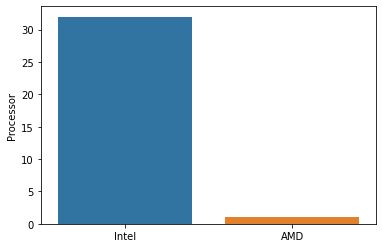

In [41]:
val = MSI_clean['Processor'].value_counts()
sns.barplot(x=['Intel', 'AMD'], y=val)

From the above graph we can assume that either MSI doesn't produce much laptops with AMD processors or most of the models with AMD laptops are out of stock. 

---
<br><br>Now, let's see the distribution of laptops on the basis of rating and price.

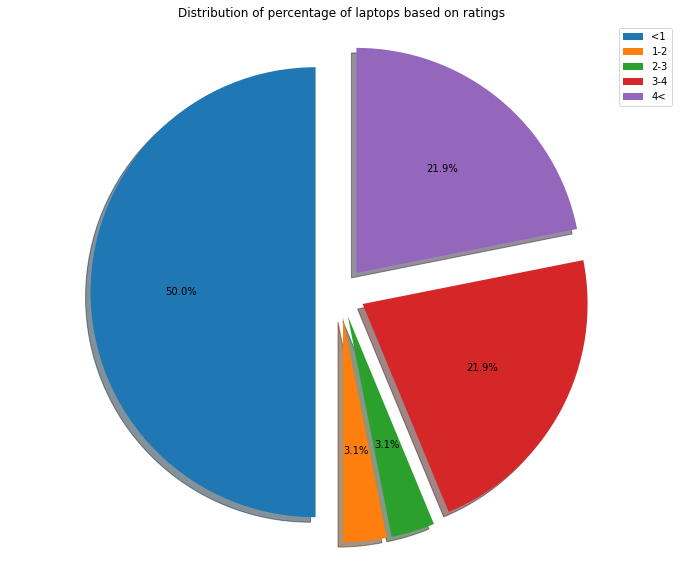

In [42]:
freq = []
rates = ['<1', '1-2', '2-3', '3-4', '4<']
for rate in range(1, 6):
    count = 0
    for rating in MSI_clean['Ratings_5']:
        if rate-1<=rating<rate:
            count+=1
    freq.append(count)

explode = (0.1, 0.1, 0.1, 0.1, 0.1)

fig1, ax1 = plt.subplots(figsize=(12,10))
ax1.pie(freq, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, radius = 0.9)
ax1.legend(rates)
ax1.axis('equal')
plt.title("Distribution of percentage of laptops based on ratings")
plt.show()

We can observe that 50% of the laptops have rating in range 0-1 stars, 43.8% in range 3-5 stars and 6.26% in range 1-2 stars. So, we can say that current customers ka satisfied with most of the products available.

---
<br><br>

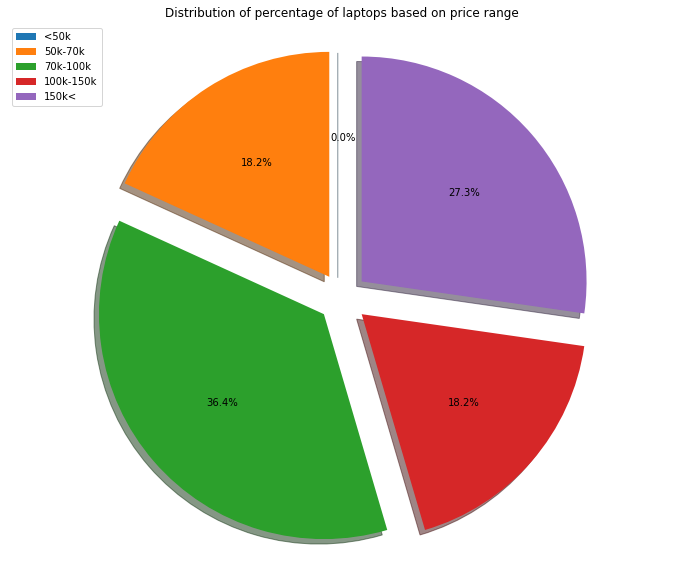

In [43]:
priceFreq = []
priceRange = ['<50k', '50k-70k', '70k-100k', '100k-150k', '150k<']

price_50k_below = MSI_clean.loc[MSI_clean.loc[:,'Price_Rs']<50000]
priceFreq.append(len(price_50k_below))

price_50k_to_70k = MSI_clean.loc[(50000<=MSI_clean.loc[:,'Price_Rs']) & (MSI_clean.loc[:,'Price_Rs']<70000)]
priceFreq.append(len(price_50k_to_70k))

price_70k_to_100k = MSI_clean.loc[(70000<=MSI_clean.loc[:,'Price_Rs']) & (MSI_clean.loc[:,'Price_Rs']<100000)]
priceFreq.append(len(price_70k_to_100k))

price_100k_to_150k = MSI_clean.loc[(100000<=MSI_clean.loc[:,'Price_Rs']) & (MSI_clean.loc[:,'Price_Rs']<150000)]
priceFreq.append(len(price_100k_to_150k))

price_150k_above = MSI_clean.loc[150000<=MSI_clean.loc[:,'Price_Rs']]
priceFreq.append(len(price_150k_above))

fig1, ax1 = plt.subplots(figsize=(12,10))
ax1.pie(priceFreq, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, radius = 0.9)
ax1.legend(priceRange)
ax1.axis('equal')
plt.title("Distribution of percentage of laptops based on price range")
plt.show()

We can see that Most of the laptops i.e., 63.7% are in mid to high price range i.e. above Rs.70K and none of the laptops have price below Rs.50k

---
<br><br>Let's create a function which can return the list of laptops in whatever range the user inputs - 

In [44]:
def getLaptops(start=0, end=0):
    l = min(start, end)
    r = max(start, end)
    Laptops = MSI_clean.loc[(MSI_clean.loc[:,'Price_Rs']>=l) & (MSI_clean.loc[:,'Price_Rs']<=r)]
    return(Laptops)

In [45]:
Laptops_in_given_range = pd.DataFrame(getLaptops(20000, 60000))
Laptops_in_given_range.index = [*range(len(Laptops_in_given_range))]
Laptops_in_given_range

# We can also directly print the list returned from the function in the following way but, it won't look elegant
# print(getLaptops(20000,60000))

,Name,Price_Rs,Ratings_5,Review_Count,URL,Processor
0,"MSI Modern 15, Intel 10th Gen. i5-10210U, 15.6...",53990.0,3.3,7.0,http://www.amazon.in/gp/slredirect/picassoRedi...,Intel


---
<br><br>
### Now let's see the least and the most in every necessary attribute

**Price -**

<br>Most expensive laptop:

In [46]:
mostExpensive = MSI_clean.loc[MSI_clean.loc[:,'Price_Rs']==max(MSI_clean.loc[:,'Price_Rs'])]
if len(mostExpensive)>1:
    for r in mostExpensive.index:
        print(r, mostExpensive.loc[r,"URL"])
else:
    print(*mostExpensive["URL"].values)
mostExpensive

http://www.amazon.in/MSI-i7-10875H-Windows-Titanium-10SGS-295IN/dp/B08MBG781T/ref=sr_1_31?dchild=1&keywords=msi+laptop&qid=1627278336&sr=8-31


,Name,Price_Rs,Ratings_5,Review_Count,URL,Processor
25,"MSI GE66 Raider, Intel 10th Gen. i7-10875H, 15...",299999.0,0.0,0.0,http://www.amazon.in/MSI-i7-10875H-Windows-Tit...,Intel


Cheapest laptop:

In [47]:
cheapest = MSI_clean.loc[MSI_clean.loc[:,'Price_Rs']==min(MSI_clean.loc[:,'Price_Rs'])]
if len(cheapest)>1:
    for r in cheapest.index:
        print(r, cheapest.loc[r,"URL"])
else:
    print(*cheapest["URL"].values)
cheapest


http://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A000534837MVNT4XY3CX8&url=%2FMSI-i5-10210U-39-62cms-Windows-A10M-482IN%2Fdp%2FB08NTVZMWD%2Fref%3Dsr_1_2_sspa%3Fdchild%3D1%26keywords%3Dmsi%2Blaptop%26qid%3D1627278334%26sr%3D8-2-spons%26psc%3D1&qualifier=1627278334&id=6346026282846977&widgetName=sp_atf


,Name,Price_Rs,Ratings_5,Review_Count,URL,Processor
1,"MSI Modern 15, Intel 10th Gen. i5-10210U, 15.6...",53990.0,3.3,7.0,http://www.amazon.in/gp/slredirect/picassoRedi...,Intel


---
<br><br>**Rating -**

<br>Least rated laptop

In [48]:
leastRated = MSI_clean.loc[MSI_clean.loc[:,'Ratings_5']==min(MSI_clean.loc[:,'Ratings_5'])]
if len(leastRated)>1:
    for r in leastRated.index:
        print(r, leastRated.loc[r,"URL"])
else:
    print(*leastRated["URL"].values)
leastRated

5 http://www.amazon.in/MSI-GF65-Thin-10SDR-i7-10750H/dp/B08THQZCVD/ref=sr_1_7?dchild=1&keywords=msi+laptop&qid=1627278334&sr=8-7
6 http://www.amazon.in/MSI-i5-10500H-IPS-Level-Windows-10SCXR-655IN/dp/B093L9SYZP/ref=sr_1_8?dchild=1&keywords=msi+laptop&qid=1627278334&sr=8-8
7 http://www.amazon.in/MSI-GF63-Thin-10SCXR-Gaming/dp/B097JXH538/ref=sr_1_9?dchild=1&keywords=msi+laptop&qid=1627278334&sr=8-9
10 http://www.amazon.in/MSI-GF65-Thin-10SDR-Gaming/dp/B097JY1CDV/ref=sr_1_14?dchild=1&keywords=msi+laptop&qid=1627278334&sr=8-14
12 http://www.amazon.in/MSI-GF63-Thin-10SCXR-Gaming/dp/B097JY48G3/ref=sr_1_16?dchild=1&keywords=msi+laptop&qid=1627278334&sr=8-16
13 http://www.amazon.in/MSI-i7-10750H-Gaming-Windows-10SCSR-660IN/dp/B08MBN18V4/ref=sr_1_17?dchild=1&keywords=msi+laptop&qid=1627278334&sr=8-17
14 http://www.amazon.in/MSI-Modern-14-A10RB-651IN-9S7-14B351-651/dp/B084S4DRB2/ref=sr_1_18?dchild=1&keywords=msi+laptop&qid=1627278334&sr=8-18
15 http://www.amazon.in/MSI-WF75-i7-10750HH-Workstatio

,Name,Price_Rs,Ratings_5,Review_Count,URL,Processor
5,"MSI GF65 Thin 10SDR, Intel i7-10750H, 15.6"" FH...",89990.0,0.0,0.0,http://www.amazon.in/MSI-GF65-Thin-10SDR-i7-10...,Intel
6,"MSI GF75 Thin, Intel i5-10500H, 17.3"" (43.9 cm...",65990.0,0.0,0.0,http://www.amazon.in/MSI-i5-10500H-IPS-Level-W...,Intel
7,"MSI GF63 Thin 10SCXR 15.6"" FHD Gaming Laptop -...",68990.0,0.0,0.0,http://www.amazon.in/MSI-GF63-Thin-10SCXR-Gami...,Intel
10,"MSI GF65 Thin 10SDR 15.6"" FHD Gaming Laptop - ...",95499.0,0.0,0.0,http://www.amazon.in/MSI-GF65-Thin-10SDR-Gamin...,Intel
12,"MSI GF63 Thin 10SCXR 15.6"" FHD Gaming Laptop -...",78990.0,0.0,0.0,http://www.amazon.in/MSI-GF63-Thin-10SCXR-Gami...,Intel
13,"MSI GF63 Thin, Intel 10th Gen. i7-10750H, 15.6...",100990.0,0.0,0.0,http://www.amazon.in/MSI-i7-10750H-Gaming-Wind...,Intel
14,MSI Modern 14 A10RB-651IN Intel Core i7-10510U...,84500.0,0.0,0.0,http://www.amazon.in/MSI-Modern-14-A10RB-651IN...,Intel
15,"MSI WF75, Intel 10th Gen. i7-10750HH, 17.3"" FH...",199990.0,0.0,0.0,http://www.amazon.in/MSI-WF75-i7-10750HH-Works...,Intel
16,"MSI Creator 17, Intel i7-10875H, 17.3"" UHD HDR...",299990.0,0.0,0.0,http://www.amazon.in/MSI-Creator-17-Space-Grey...,Intel
19,(Renewed) MSI Modern 15 A10RB-032IN Intel Core...,69990.0,0.0,0.0,http://www.amazon.in/MSI-Modern-15-A10RB-032IN...,Intel


Highest rated laptop:

In [49]:
highestRated = MSI_clean.loc[MSI_clean.loc[:,'Ratings_5']==max(MSI_clean.loc[:,'Ratings_5'])]
if len(highestRated)>1:
    for r in highestRated.index:
        print(r, highestRated.loc[r,"URL"])
else:
    print(*highestRated["URL"].values)
highestRated

http://www.amazon.in/MSI-i7-10875H-Windows-Titanium-10SFS-443IN/dp/B08MBK4D4H/ref=sr_1_15?dchild=1&keywords=msi+laptop&qid=1627278334&sr=8-15


,Name,Price_Rs,Ratings_5,Review_Count,URL,Processor
11,"MSI GE66 Raider, Intel 10th Gen. i7-10875H, 15...",249990.0,5.0,3.0,http://www.amazon.in/MSI-i7-10875H-Windows-Tit...,Intel


---
<br><br>**Reviews -**

<br>Most reviewed laptop:

In [50]:
mostReviewed = MSI_clean.loc[MSI_clean.loc[:,'Review_Count']==max(MSI_clean.loc[:,'Review_Count'])]
if len(mostReviewed)>1:
    for r in mostReviewed.index:
        print(r, mostReviewed.loc[r,"URL"])
else:
    print(*mostReviewed["URL"].values)
mostReviewed

http://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A07601222ZLUTAQ1PYU0N&url=%2FMSI-Gaming-Windows-RX5500M-A4DDR-212IN%2Fdp%2FB08GYH6HKN%2Fref%3Dsr_1_1_sspa%3Fdchild%3D1%26keywords%3Dmsi%2Blaptop%26qid%3D1627278334%26sr%3D8-1-spons%26psc%3D1&qualifier=1627278334&id=6346026282846977&widgetName=sp_atf


,Name,Price_Rs,Ratings_5,Review_Count,URL,Processor
0,"MSI Bravo 15 Ryzen 7 4800H 15.6"" (39.62cms) FH...",75990.0,4.2,53.0,http://www.amazon.in/gp/slredirect/picassoRedi...,AMD


Least reviewed laptop:

In [51]:
leastReviewed = MSI_clean.loc[MSI_clean.loc[:,'Review_Count']==min(MSI_clean.loc[:,'Review_Count'])]
if len(leastReviewed)>1:
    for r in leastReviewed.index:
        print(r, leastReviewed.loc[r,"URL"])
else:
    print(*leastReviewed["URL"].values)
leastReviewed

5 http://www.amazon.in/MSI-GF65-Thin-10SDR-i7-10750H/dp/B08THQZCVD/ref=sr_1_7?dchild=1&keywords=msi+laptop&qid=1627278334&sr=8-7
6 http://www.amazon.in/MSI-i5-10500H-IPS-Level-Windows-10SCXR-655IN/dp/B093L9SYZP/ref=sr_1_8?dchild=1&keywords=msi+laptop&qid=1627278334&sr=8-8
7 http://www.amazon.in/MSI-GF63-Thin-10SCXR-Gaming/dp/B097JXH538/ref=sr_1_9?dchild=1&keywords=msi+laptop&qid=1627278334&sr=8-9
10 http://www.amazon.in/MSI-GF65-Thin-10SDR-Gaming/dp/B097JY1CDV/ref=sr_1_14?dchild=1&keywords=msi+laptop&qid=1627278334&sr=8-14
12 http://www.amazon.in/MSI-GF63-Thin-10SCXR-Gaming/dp/B097JY48G3/ref=sr_1_16?dchild=1&keywords=msi+laptop&qid=1627278334&sr=8-16
13 http://www.amazon.in/MSI-i7-10750H-Gaming-Windows-10SCSR-660IN/dp/B08MBN18V4/ref=sr_1_17?dchild=1&keywords=msi+laptop&qid=1627278334&sr=8-17
14 http://www.amazon.in/MSI-Modern-14-A10RB-651IN-9S7-14B351-651/dp/B084S4DRB2/ref=sr_1_18?dchild=1&keywords=msi+laptop&qid=1627278334&sr=8-18
15 http://www.amazon.in/MSI-WF75-i7-10750HH-Workstatio

,Name,Price_Rs,Ratings_5,Review_Count,URL,Processor
5,"MSI GF65 Thin 10SDR, Intel i7-10750H, 15.6"" FH...",89990.0,0.0,0.0,http://www.amazon.in/MSI-GF65-Thin-10SDR-i7-10...,Intel
6,"MSI GF75 Thin, Intel i5-10500H, 17.3"" (43.9 cm...",65990.0,0.0,0.0,http://www.amazon.in/MSI-i5-10500H-IPS-Level-W...,Intel
7,"MSI GF63 Thin 10SCXR 15.6"" FHD Gaming Laptop -...",68990.0,0.0,0.0,http://www.amazon.in/MSI-GF63-Thin-10SCXR-Gami...,Intel
10,"MSI GF65 Thin 10SDR 15.6"" FHD Gaming Laptop - ...",95499.0,0.0,0.0,http://www.amazon.in/MSI-GF65-Thin-10SDR-Gamin...,Intel
12,"MSI GF63 Thin 10SCXR 15.6"" FHD Gaming Laptop -...",78990.0,0.0,0.0,http://www.amazon.in/MSI-GF63-Thin-10SCXR-Gami...,Intel
13,"MSI GF63 Thin, Intel 10th Gen. i7-10750H, 15.6...",100990.0,0.0,0.0,http://www.amazon.in/MSI-i7-10750H-Gaming-Wind...,Intel
14,MSI Modern 14 A10RB-651IN Intel Core i7-10510U...,84500.0,0.0,0.0,http://www.amazon.in/MSI-Modern-14-A10RB-651IN...,Intel
15,"MSI WF75, Intel 10th Gen. i7-10750HH, 17.3"" FH...",199990.0,0.0,0.0,http://www.amazon.in/MSI-WF75-i7-10750HH-Works...,Intel
16,"MSI Creator 17, Intel i7-10875H, 17.3"" UHD HDR...",299990.0,0.0,0.0,http://www.amazon.in/MSI-Creator-17-Space-Grey...,Intel
19,(Renewed) MSI Modern 15 A10RB-032IN Intel Core...,69990.0,0.0,0.0,http://www.amazon.in/MSI-Modern-15-A10RB-032IN...,Intel


---

## Conclusion

Using the code we can extract a .csv file with fields Name, Price, Rating, Review count and URL of any product from Amazon India.

<br>
We can use this .csv file to create a DataFrame and visualize it or print out some specific data as per our need. For some products additional modification in the code may be needed to get the desired data as we have done for MSI Laptops. Based on the graphs and different tables printed in project one can come to a probable decision about any product. 

<br>
For this project we can conclude that most of the MSI laptops are in medium to high price range and most of them use Intel processor. Almost 50% i.e., 16 laptops have no ratings or reviews. The cheapest and most expensive price of a laptop is Rs.53,990 (rating = 3.3 stars, reviews = 7) and Rs.2,99,999 (rating = 0, reviews = 0) respectively. 

<br>
The most reviewed and preferrable model is MSI Bravo 15 Ryzen 7 4800H. It has price = Rs.75,990, rating = 4.2 stars and reviews = 53